In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [153]:
league = pd.read_csv('league_stats.csv',index_col=0)
league.columns

Index(['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Age', 'W', 'L', 'MOV', 'SOS', 'SRS', 'ORtg',
       'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Year'],
      dtype='object')

<AxesSubplot: xlabel='Count', ylabel='ORtg'>

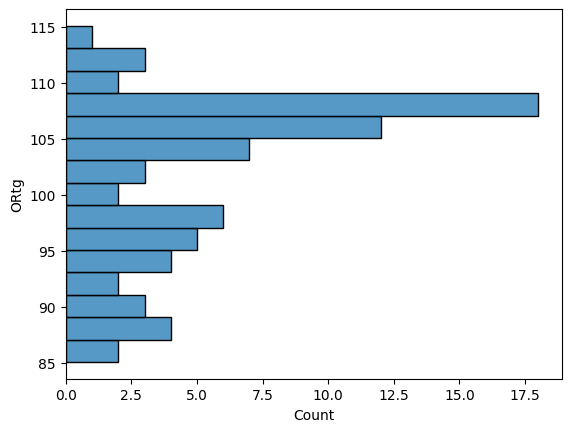

In [154]:
sns.histplot(league,y='ORtg',binwidth=2)

In [155]:
df = pd.read_csv('team_stats.csv',index_col=0)
df['Win%'] = df['W'] / (df['W'] + df['L'])
df.columns

Index(['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Age', 'W', 'L', 'MOV', 'SOS', 'SRS', 'ORtg',
       'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Year', 'Win%'],
      dtype='object')

<AxesSubplot: xlabel='ORtg', ylabel='DRtg'>

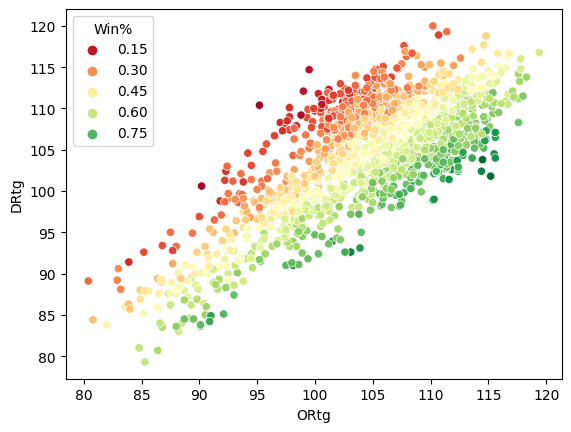

In [156]:
sns.scatterplot(data=df, x='ORtg', y='DRtg', hue='Win%', palette='RdYlGn', hue_norm=(df['Win%'].min(), df['Win%'].max()))

In [157]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
df_test = df.dropna(subset=['ORtg', 'DRtg', 'Win%'])

X = df_test[['ORtg', 'DRtg']]
y = df_test['Win%']

# Adding a constant to the model (i.e., bias or intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Summary of regression, including the significance of variables
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Win%   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Tue, 19 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:                 2944.0
No. Observations:                1637   AIC:                            -5882.
Df Residuals:                    1634   BIC:                            -5866.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5080      0.017     29.961      0.0

In [158]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the features and target variable
X = df_test[['ORtg', 'DRtg']]
y = df_test['Win%']

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the coefficients
coef = model.coef_
print("Coefficients: ", coef)

Coefficients:  [ 0.0312646  -0.03134342]


In [182]:
# Drop rows with NaN values in specific columns
df.dropna(subset=['ORtg', 'DRtg','NRtg', 'Year'], inplace=True)
league.dropna(subset=['ORtg', 'DRtg', 'Year'], inplace=True)


In [183]:
# Merge the main DataFrame with the league average DataFrame on the 'Year' column
merged_df = pd.merge(df, league, on='Year', suffixes=('', '_league'))

# Calculate the normalized ORtg and DRtg
merged_df['ORtg_normalized'] = merged_df['ORtg'] - merged_df['ORtg_league']
merged_df['DRtg_normalized'] = merged_df['DRtg'] - merged_df['DRtg_league']
merged_df['NRtg_normalized'] = merged_df['NRtg'] - merged_df['NRtg_league']


In [184]:
merged_df

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORtg_league,DRtg_league,NRtg_league,Pace_league,FTr_league,3PAr_league,TS%_league,ORtg_normalized,DRtg_normalized,NRtg_normalized
0,Minneapolis Lakers*,68.0,NaN,30.6,82.2,0.373,NaN,NaN,NaN,30.6,...,85.1,85.1,NaN,97.4,0.399,NaN,0.428,1.3,-4.4,NaN
1,Rochester Royals*,68.0,NaN,29.9,79.1,0.378,NaN,NaN,NaN,29.9,...,85.1,85.1,NaN,97.4,0.399,NaN,0.428,4.2,1.1,NaN
2,Philadelphia Warriors*,66.0,NaN,30.1,85.8,0.350,NaN,NaN,NaN,30.1,...,85.1,85.1,NaN,97.4,0.399,NaN,0.428,-0.3,-4.1,NaN
3,Boston Celtics*,69.0,NaN,29.9,81.3,0.368,NaN,NaN,NaN,29.9,...,85.1,85.1,NaN,97.4,0.399,NaN,0.428,2.2,2.5,NaN
4,New York Knicks*,66.0,NaN,30.9,81.5,0.379,NaN,NaN,NaN,30.9,...,85.1,85.1,NaN,97.4,0.399,NaN,0.428,2.9,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,Portland Trail Blazers,82.0,240.6,40.5,85.4,0.474,12.9,35.3,0.365,27.6,...,114.8,114.8,NaN,99.1,0.266,0.387,0.581,0.0,4.0,NaN
1693,Charlotte Hornets,82.0,241.8,41.3,90.4,0.457,10.7,32.5,0.330,30.5,...,114.8,114.8,NaN,99.1,0.266,0.387,0.581,-5.6,0.5,NaN
1694,San Antonio Spurs,82.0,242.1,43.1,92.6,0.465,11.1,32.2,0.345,32.0,...,114.8,114.8,NaN,99.1,0.266,0.387,0.581,-4.6,5.2,NaN
1695,Houston Rockets,82.0,240.9,40.6,88.9,0.457,10.4,31.9,0.327,30.2,...,114.8,114.8,NaN,99.1,0.266,0.387,0.581,-3.4,4.5,NaN


In [185]:
# Calculate the Z-scores for ORtg and DRtg for each year
for year in merged_df['Year'].unique():
    yearly_data = merged_df[merged_df['Year'] == year]

    ortg_mean = yearly_data['ORtg'].mean()
    ortg_std = yearly_data['ORtg'].std()

    nrtg_mean = 0
    nrtg_std = yearly_data['NRtg'].std()

    drtg_mean = yearly_data['DRtg'].mean()
    drtg_std = yearly_data['DRtg'].std()

    merged_df.loc[merged_df['Year'] == year, 'ORtg_zscore'] = (merged_df['ORtg'] - ortg_mean) / ortg_std
    merged_df.loc[merged_df['Year'] == year, 'DRtg_zscore'] = (merged_df['DRtg'] - drtg_mean) / drtg_std
    merged_df.loc[merged_df['Year'] == year, 'NRtg_zscore'] = (merged_df['NRtg'] - nrtg_mean) / nrtg_std

In [186]:
merged_df.sort_values('ORtg_zscore',ascending=False)[['Year','Team','ORtg_zscore']].head(20)

,Year,Team,ORtg_zscore
1098,2007.0,Phoenix Suns*,2.821339
1014,2004.0,Dallas Mavericks*,2.712212
434,1982.0,Denver Nuggets*,2.632838
1367,2016.0,Golden State Warriors*,2.513609
1037,2005.0,Phoenix Suns*,2.468395
191,1971.0,Milwaukee Bucks*,2.463415
805,1997.0,Chicago Bulls*,2.336265
1499,2020.0,Dallas Mavericks*,2.289322
1191,2010.0,Phoenix Suns*,2.244634
953,2002.0,Dallas Mavericks*,2.243748


In [187]:
merged_df.sort_values('DRtg_zscore',ascending=False)[['Year','Team','DRtg_zscore']].head(20)

,Year,Team,DRtg_zscore
667,1991.0,Denver Nuggets,2.506656
336,1978.0,Houston Rockets,2.471089
1485,2019.0,Cleveland Cavaliers,2.445675
1366,2015.0,Minnesota Timberwolves,2.404162
1087,2006.0,Seattle SuperSonics,2.392010
721,1993.0,Dallas Mavericks,2.321844
639,1990.0,Orlando Magic,2.306721
519,1985.0,Golden State Warriors,2.208756
888,1999.0,Denver Nuggets,2.189079
1694,2023.0,San Antonio Spurs,2.109903


In [188]:
merged_df.sort_values('NRtg_zscore',ascending=False)[['Year','Team','NRtg_zscore']].head(20)

,Year,Team,NRtg_zscore
277,1976.0,Golden State Warriors*,2.740643
1397,2017.0,Golden State Warriors*,2.638425
177,1970.0,New York Knicks*,2.416286
191,1971.0,Milwaukee Bucks*,2.343920
776,1996.0,Chicago Bulls*,2.343775
1099,2007.0,San Antonio Spurs*,2.213467
520,1986.0,Boston Celtics*,2.193476
317,1978.0,Portland Trail Blazers*,2.142842
668,1992.0,Chicago Bulls*,2.137543
1368,2016.0,San Antonio Spurs*,2.120690


In [189]:
threshold = 2
merged_df[(merged_df['NRtg_zscore'] > threshold) & (merged_df['DRtg_zscore'] > -threshold) & (merged_df['ORtg_zscore'] > threshold)].sort_values('NRtg_zscore',ascending=False)[['Year','Team','MOV']]

,Year,Team,MOV
1397,2017.0,Golden State Warriors*,11.63
191,1971.0,Milwaukee Bucks*,12.26
1367,2016.0,Golden State Warriors*,10.76


<AxesSubplot: xlabel='Year', ylabel='ORtg'>

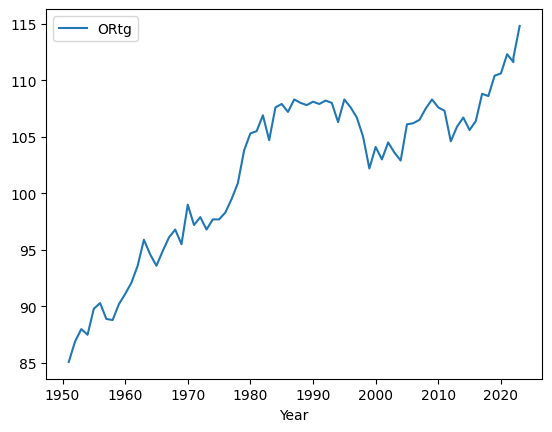

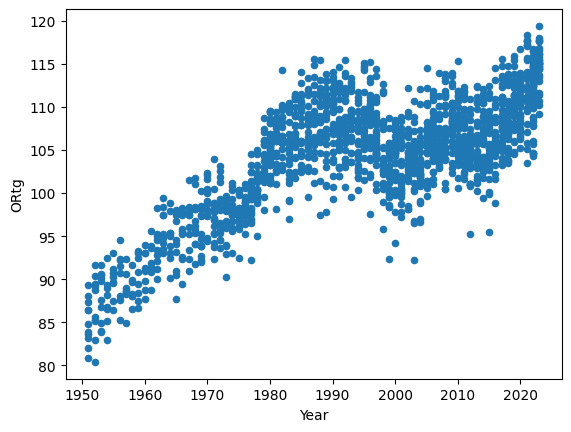

In [167]:
league.plot(x='Year',y=['ORtg'])
df.plot(x='Year',y='ORtg',kind='scatter',)

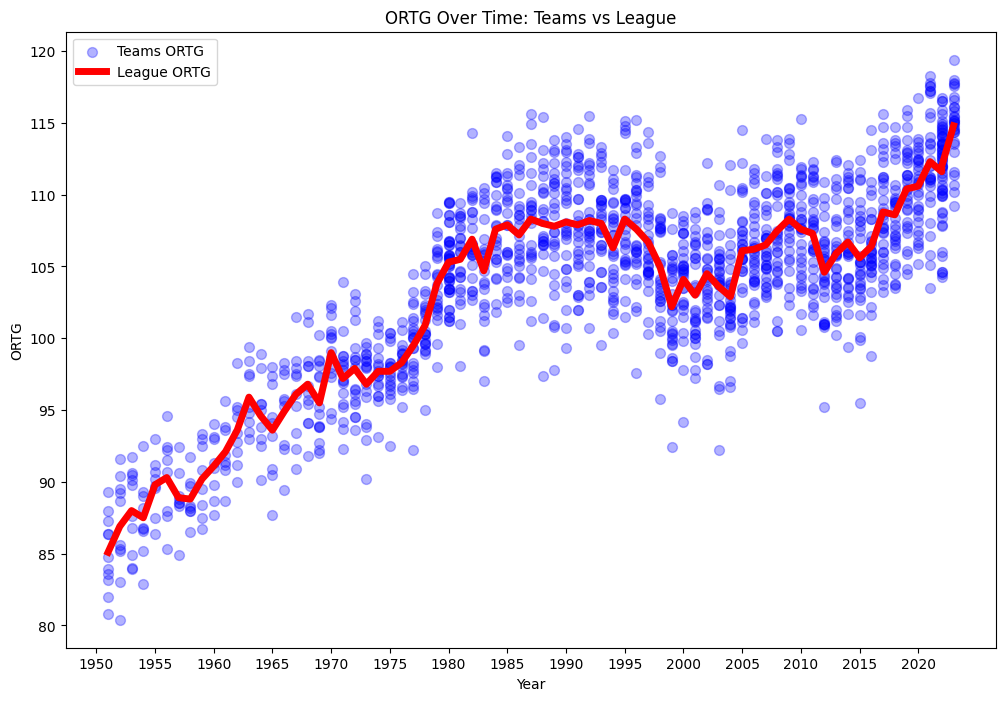

In [207]:
import matplotlib.pyplot as plt

# Create the figure and the axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the scatter plot (df)
ax.scatter(df['Year'], df['ORtg'], label='Teams ORTG', c='blue', s=50, alpha=0.3)

# Plot the line graph (league)
ax.plot(league['Year'], league['ORtg'], label='League ORTG', c='red',linewidth=5)

x_ticks = range(league['Year'].min()-1, league['Year'].max() + 1, 5)
ax.set_xticks(x_ticks)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('ORTG')
ax.set_title('ORTG Over Time: Teams vs League')
ax.legend()

plt.show()